
# 3. Visualization and Interpretation

This notebook reads the outputs from the training notebook and shows:
- global concept importance
- fake vs real concept summaries
- per-user important concepts (test speakers)
- plots / heatmaps

This notebook is self-contained and does not import the `.py` script.


In [3]:

from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PROJECT_ROOT = Path('/home/SpeakerRec/BioVoice')
ANALYSIS_DIR = PROJECT_ROOT / 'data' / 'tcav' / 'logreg_concept_analysis' / 'stage4_spoofwrapper_magnitude'
PLOTS_DIR = ANALYSIS_DIR / 'plots'
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print('ANALYSIS_DIR =', ANALYSIS_DIR)


ANALYSIS_DIR = /home/SpeakerRec/BioVoice/data/tcav/logreg_concept_analysis/stage4_spoofwrapper_magnitude


In [4]:

# Load exported analysis files
paths = {
    'meta': ANALYSIS_DIR / 'run_metadata.json',
    'coef': ANALYSIS_DIR / 'global_concept_coefficients.csv',
    'class_summary': ANALYSIS_DIR / 'classwise_concept_summary.csv',
    'preds': ANALYSIS_DIR / 'test_predictions.csv',
    'user_contrib': ANALYSIS_DIR / 'test_user_mean_contributions.csv',
    'top_user': ANALYSIS_DIR / 'test_user_top_concepts.csv',
}
for k, p in paths.items():
    assert p.exists(), f'Missing file for {k}: {p}'

run_meta = json.loads(paths['meta'].read_text(encoding='utf-8'))
coef_df = pd.read_csv(paths['coef'])
class_summary_df = pd.read_csv(paths['class_summary'])
pred_df = pd.read_csv(paths['preds'])
user_contrib = pd.read_csv(paths['user_contrib'])
top_user_df = pd.read_csv(paths['top_user'])

print('Loaded files successfully')
print('Train speakers:', run_meta['speaker_split']['train_speakers'])
print('Test speakers :', run_meta['speaker_split']['test_speakers'])
print('Metrics:')
print(json.dumps({k:v for k,v in run_meta['metrics'].items() if k != 'classification_report'}, indent=2))
print(run_meta['metrics']['classification_report'])


Loaded files successfully
Train speakers: ['LA_0006', 'LA_0008', 'LA_0015', 'LA_0021', 'LA_0022', 'LA_0024', 'LA_0030', 'LA_0031', 'LA_0032', 'LA_0033', 'LA_0035', 'LA_0038', 'LA_0040', 'LA_0045', 'LA_0047']
Test speakers : ['LA_0003', 'LA_0004', 'LA_0026', 'LA_0039', 'LA_0043']
Metrics:
{
  "accuracy": 0.54,
  "precision_fake_1": 0.5416666666666666,
  "recall_fake_1": 0.52,
  "f1_fake_1": 0.5306122448979592,
  "confusion_matrix_labels_[0_real,1_fake]": [
    [
      28,
      22
    ],
    [
      24,
      26
    ]
  ]
}
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        50
           1       0.54      0.52      0.53        50

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



In [5]:

# Tables: global importance + class-wise differences
print('Top global coefficients (absolute):')
display(coef_df.head(20))

print('Top concepts higher in fake (mean difference fake-real):')
display(class_summary_df.sort_values('mean_diff_fake_minus_real', ascending=False).head(15))

print('Top concepts higher in real (mean difference fake-real most negative):')
display(class_summary_df.sort_values('mean_diff_fake_minus_real', ascending=True).head(15))


Top global coefficients (absolute):


,feature,metric,concept,coefficient,abs_coefficient,direction
0,magnitude__long_dropping_steep_thick,magnitude,long_dropping_steep_thick,-0.691015,0.691015,real
1,magnitude__long_rising_steep_thin,magnitude,long_rising_steep_thin,-0.678268,0.678268,real
2,magnitude__short_dropping_steep_thin,magnitude,short_dropping_steep_thin,0.588057,0.588057,fake
3,magnitude__long_constant_thick,magnitude,long_constant_thick,0.565819,0.565819,fake
4,magnitude__long_constant_thick_Vibrato,magnitude,long_constant_thick_Vibrato,-0.408276,0.408276,real
5,magnitude__short_constant_thick,magnitude,short_constant_thick,-0.406689,0.406689,real
6,magnitude__long_rising_flat_thick,magnitude,long_rising_flat_thick,0.346418,0.346418,fake
7,magnitude__long_rising_steep_thick,magnitude,long_rising_steep_thick,0.249325,0.249325,fake
8,magnitude__long_dropping_steep_thin,magnitude,long_dropping_steep_thin,-0.162507,0.162507,real
9,magnitude__short_rising_steep_thin,magnitude,short_rising_steep_thin,0.128139,0.128139,fake


Top concepts higher in fake (mean difference fake-real):


,feature,metric,concept,real_mean_true_label_0,fake_mean_true_label_1,real_median_true_label_0,fake_median_true_label_1,mean_diff_fake_minus_real
2,magnitude__long_dropping_flat_thick,magnitude,long_dropping_flat_thick,0.288807,0.178152,0.284265,0.178042,-0.110654
11,magnitude__short_dropping_steep_thin,magnitude,short_dropping_steep_thin,0.205627,0.093085,0.213750,0.136438,-0.112542
6,magnitude__long_rising_flat_thick,magnitude,long_rising_flat_thick,0.178916,0.062952,0.204238,0.125090,-0.115964
13,magnitude__short_rising_steep_thin,magnitude,short_rising_steep_thin,0.253480,0.137455,0.267517,0.198390,-0.116024
3,magnitude__long_dropping_flat_thick_Vibrato,magnitude,long_dropping_flat_thick_Vibrato,0.257266,0.124902,0.245732,0.201767,-0.132364
12,magnitude__short_rising_steep_thick,magnitude,short_rising_steep_thick,0.292123,0.152873,0.295034,0.197314,-0.139250
9,magnitude__short_constant_thick,magnitude,short_constant_thick,0.366833,0.223373,0.386924,0.258080,-0.143459
10,magnitude__short_dropping_steep_thick,magnitude,short_dropping_steep_thick,0.354139,0.200373,0.309709,0.252753,-0.153766
5,magnitude__long_dropping_steep_thin,magnitude,long_dropping_steep_thin,0.175889,0.013422,0.157798,0.077477,-0.162467
0,magnitude__long_constant_thick,magnitude,long_constant_thick,0.253332,0.090646,0.234806,0.137616,-0.162686


Top concepts higher in real (mean difference fake-real most negative):


,feature,metric,concept,real_mean_true_label_0,fake_mean_true_label_1,real_median_true_label_0,fake_median_true_label_1,mean_diff_fake_minus_real
8,magnitude__long_rising_steep_thin,magnitude,long_rising_steep_thin,0.137779,-0.102174,0.117640,-0.077471,-0.239952
7,magnitude__long_rising_steep_thick,magnitude,long_rising_steep_thick,-0.018936,-0.253326,-0.060400,-0.209922,-0.234390
4,magnitude__long_dropping_steep_thick,magnitude,long_dropping_steep_thick,0.232696,0.037940,0.256368,0.074390,-0.194756
1,magnitude__long_constant_thick_Vibrato,magnitude,long_constant_thick_Vibrato,0.372123,0.204452,0.368329,0.221203,-0.167671
0,magnitude__long_constant_thick,magnitude,long_constant_thick,0.253332,0.090646,0.234806,0.137616,-0.162686
5,magnitude__long_dropping_steep_thin,magnitude,long_dropping_steep_thin,0.175889,0.013422,0.157798,0.077477,-0.162467
10,magnitude__short_dropping_steep_thick,magnitude,short_dropping_steep_thick,0.354139,0.200373,0.309709,0.252753,-0.153766
9,magnitude__short_constant_thick,magnitude,short_constant_thick,0.366833,0.223373,0.386924,0.258080,-0.143459
12,magnitude__short_rising_steep_thick,magnitude,short_rising_steep_thick,0.292123,0.152873,0.295034,0.197314,-0.139250
3,magnitude__long_dropping_flat_thick_Vibrato,magnitude,long_dropping_flat_thick_Vibrato,0.257266,0.124902,0.245732,0.201767,-0.132364


In [6]:

# Table: per-user important concepts on test speakers
# list_type = top_fake_supporting / top_real_supporting
for spk in sorted(top_user_df['speaker_id'].astype(str).unique().tolist()):
    print('\n===', spk, '===')
    display(top_user_df[top_user_df['speaker_id'] == spk].sort_values(['true label', 'list_type', 'rank']))



=== LA_0003 ===


,speaker_id,true label,list_type,rank,feature,metric,concept,mean_contribution
0,LA_0003,0,top_fake_supporting,1,magnitude__short_dropping_steep_thin,magnitude,short_dropping_steep_thin,0.234638
1,LA_0003,0,top_fake_supporting,2,magnitude__long_constant_thick,magnitude,long_constant_thick,0.186119
2,LA_0003,0,top_fake_supporting,3,magnitude__long_rising_steep_thick,magnitude,long_rising_steep_thick,0.170177
3,LA_0003,0,top_real_supporting,1,magnitude__long_rising_steep_thin,magnitude,long_rising_steep_thin,-0.417493
4,LA_0003,0,top_real_supporting,2,magnitude__long_dropping_steep_thick,magnitude,long_dropping_steep_thick,-0.376968
5,LA_0003,0,top_real_supporting,3,magnitude__short_constant_thick,magnitude,short_constant_thick,-0.179622
6,LA_0003,1,top_fake_supporting,1,magnitude__long_rising_steep_thick,magnitude,long_rising_steep_thick,0.099447
7,LA_0003,1,top_fake_supporting,2,magnitude__long_constant_thick_Vibrato,magnitude,long_constant_thick_Vibrato,0.045949
8,LA_0003,1,top_fake_supporting,3,magnitude__short_dropping_steep_thin,magnitude,short_dropping_steep_thin,0.045665
9,LA_0003,1,top_real_supporting,1,magnitude__long_dropping_steep_thick,magnitude,long_dropping_steep_thick,-0.162640



=== LA_0004 ===


,speaker_id,true label,list_type,rank,feature,metric,concept,mean_contribution
12,LA_0004,0,top_fake_supporting,1,magnitude__long_rising_steep_thin,magnitude,long_rising_steep_thin,0.474226
13,LA_0004,0,top_fake_supporting,2,magnitude__short_constant_thick,magnitude,short_constant_thick,0.096507
14,LA_0004,0,top_fake_supporting,3,magnitude__long_dropping_steep_thick,magnitude,long_dropping_steep_thick,0.091423
15,LA_0004,0,top_real_supporting,1,magnitude__short_dropping_steep_thin,magnitude,short_dropping_steep_thin,-0.358249
16,LA_0004,0,top_real_supporting,2,magnitude__long_rising_steep_thick,magnitude,long_rising_steep_thick,-0.218105
17,LA_0004,0,top_real_supporting,3,magnitude__long_constant_thick,magnitude,long_constant_thick,-0.173520
18,LA_0004,1,top_fake_supporting,1,magnitude__long_rising_steep_thin,magnitude,long_rising_steep_thin,0.820082
19,LA_0004,1,top_fake_supporting,2,magnitude__long_dropping_steep_thick,magnitude,long_dropping_steep_thick,0.458833
20,LA_0004,1,top_fake_supporting,3,magnitude__long_constant_thick_Vibrato,magnitude,long_constant_thick_Vibrato,0.234236
21,LA_0004,1,top_real_supporting,1,magnitude__short_dropping_steep_thin,magnitude,short_dropping_steep_thin,-0.472996



=== LA_0026 ===


,speaker_id,true label,list_type,rank,feature,metric,concept,mean_contribution
24,LA_0026,0,top_fake_supporting,1,magnitude__long_constant_thick,magnitude,long_constant_thick,0.221058
25,LA_0026,0,top_fake_supporting,2,magnitude__long_dropping_steep_thick,magnitude,long_dropping_steep_thick,0.173007
26,LA_0026,0,top_fake_supporting,3,magnitude__short_constant_thick,magnitude,short_constant_thick,0.045091
27,LA_0026,0,top_real_supporting,1,magnitude__long_rising_steep_thin,magnitude,long_rising_steep_thin,-0.161642
28,LA_0026,0,top_real_supporting,2,magnitude__long_constant_thick_Vibrato,magnitude,long_constant_thick_Vibrato,-0.158325
29,LA_0026,0,top_real_supporting,3,magnitude__long_rising_flat_thick,magnitude,long_rising_flat_thick,-0.116628
30,LA_0026,1,top_fake_supporting,1,magnitude__long_constant_thick,magnitude,long_constant_thick,0.647026
31,LA_0026,1,top_fake_supporting,2,magnitude__short_dropping_steep_thin,magnitude,short_dropping_steep_thin,0.625575
32,LA_0026,1,top_fake_supporting,3,magnitude__long_rising_steep_thick,magnitude,long_rising_steep_thick,0.205248
33,LA_0026,1,top_real_supporting,1,magnitude__long_rising_steep_thin,magnitude,long_rising_steep_thin,-0.657449



=== LA_0039 ===


,speaker_id,true label,list_type,rank,feature,metric,concept,mean_contribution
36,LA_0039,0,top_fake_supporting,1,magnitude__long_rising_steep_thin,magnitude,long_rising_steep_thin,0.262949
37,LA_0039,0,top_fake_supporting,2,magnitude__long_dropping_steep_thick,magnitude,long_dropping_steep_thick,0.152957
38,LA_0039,0,top_fake_supporting,3,magnitude__short_constant_thick,magnitude,short_constant_thick,0.072963
39,LA_0039,0,top_real_supporting,1,magnitude__long_rising_flat_thick,magnitude,long_rising_flat_thick,-0.122214
40,LA_0039,0,top_real_supporting,2,magnitude__long_constant_thick_Vibrato,magnitude,long_constant_thick_Vibrato,-0.102817
41,LA_0039,0,top_real_supporting,3,magnitude__short_dropping_steep_thin,magnitude,short_dropping_steep_thin,-0.064226
42,LA_0039,1,top_fake_supporting,1,magnitude__long_rising_steep_thin,magnitude,long_rising_steep_thin,0.438228
43,LA_0039,1,top_fake_supporting,2,magnitude__long_dropping_steep_thick,magnitude,long_dropping_steep_thick,0.373047
44,LA_0039,1,top_fake_supporting,3,magnitude__long_dropping_steep_thin,magnitude,long_dropping_steep_thin,0.078887
45,LA_0039,1,top_real_supporting,1,magnitude__short_dropping_steep_thin,magnitude,short_dropping_steep_thin,-0.221692



=== LA_0043 ===


,speaker_id,true label,list_type,rank,feature,metric,concept,mean_contribution
48,LA_0043,0,top_fake_supporting,1,magnitude__long_constant_thick,magnitude,long_constant_thick,0.709989
49,LA_0043,0,top_fake_supporting,2,magnitude__short_dropping_steep_thin,magnitude,short_dropping_steep_thin,0.707071
50,LA_0043,0,top_fake_supporting,3,magnitude__long_rising_flat_thick,magnitude,long_rising_flat_thick,0.428390
51,LA_0043,0,top_real_supporting,1,magnitude__long_dropping_steep_thick,magnitude,long_dropping_steep_thick,-0.816089
52,LA_0043,0,top_real_supporting,2,magnitude__long_constant_thick_Vibrato,magnitude,long_constant_thick_Vibrato,-0.563186
53,LA_0043,0,top_real_supporting,3,magnitude__short_constant_thick,magnitude,short_constant_thick,-0.427065
54,LA_0043,1,top_fake_supporting,1,magnitude__long_rising_steep_thin,magnitude,long_rising_steep_thin,0.326839
55,LA_0043,1,top_fake_supporting,2,magnitude__short_dropping_steep_thin,magnitude,short_dropping_steep_thin,0.324159
56,LA_0043,1,top_fake_supporting,3,magnitude__long_rising_flat_thick,magnitude,long_rising_flat_thick,0.273227
57,LA_0043,1,top_real_supporting,1,magnitude__long_dropping_steep_thick,magnitude,long_dropping_steep_thick,-0.379526


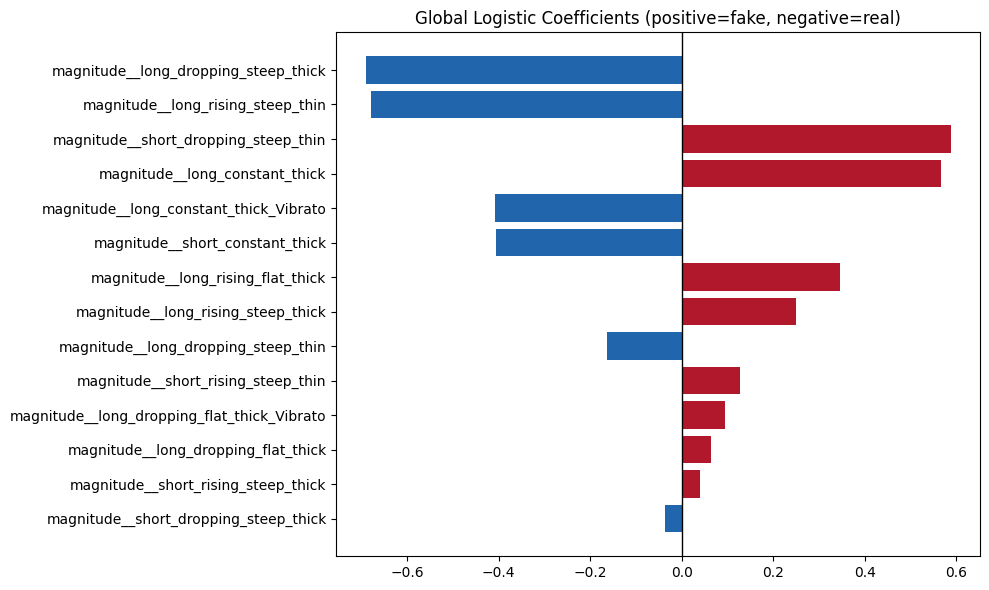

Saved: /home/SpeakerRec/BioVoice/data/tcav/logreg_concept_analysis/stage4_spoofwrapper_magnitude/plots/global_coefficients_top20.png


In [7]:

# Plot 1: Global coefficient bar chart (top 20 by absolute value)
plot_df = coef_df.head(20).copy().iloc[::-1]
colors = ['#b2182b' if d == 'fake' else '#2166ac' if d == 'real' else '#666666' for d in plot_df['direction']]

plt.figure(figsize=(10, max(6, 0.35 * len(plot_df))))
plt.barh(plot_df['feature'], plot_df['coefficient'], color=colors)
plt.axvline(0, color='black', linewidth=1)
plt.title('Global Logistic Coefficients (positive=fake, negative=real)')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'global_coefficients_top20.png', dpi=150)
plt.show()
print('Saved:', PLOTS_DIR / 'global_coefficients_top20.png')


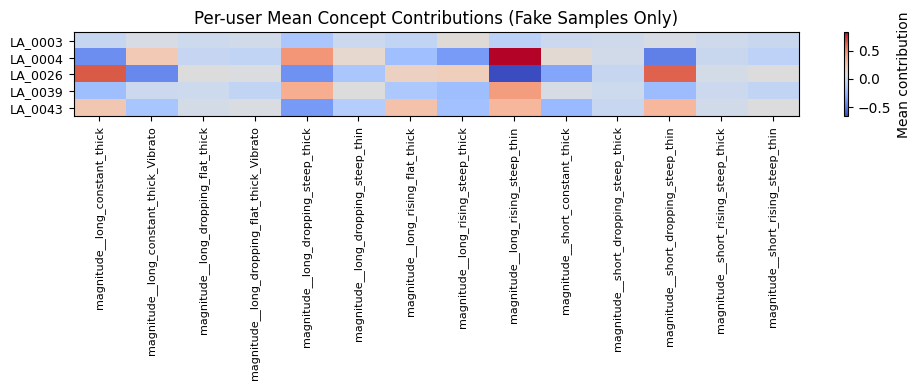

Saved: /home/SpeakerRec/BioVoice/data/tcav/logreg_concept_analysis/stage4_spoofwrapper_magnitude/plots/user_heatmap_fake_samples.png


In [8]:

# Plot 2: Per-user heatmap (fake samples only, mean contributions)
fake_user = user_contrib[user_contrib['true label'] == 1].copy()
if fake_user.empty:
    print('No fake samples in test user contributions.')
else:
    heat = fake_user.pivot_table(index='speaker_id', columns='feature', values='mean_contribution', aggfunc='mean')
    test_speakers = run_meta['speaker_split']['test_speakers']
    heat = heat.loc[[s for s in test_speakers if s in heat.index]]
    heat = heat.fillna(0)

    plt.figure(figsize=(max(10, 0.45 * heat.shape[1]), max(4, 0.6 * heat.shape[0])))
    im = plt.imshow(heat.to_numpy(), aspect='auto', cmap='coolwarm')
    plt.colorbar(im, label='Mean contribution')
    plt.xticks(range(heat.shape[1]), heat.columns, rotation=90, fontsize=8)
    plt.yticks(range(heat.shape[0]), heat.index, fontsize=9)
    plt.title('Per-user Mean Concept Contributions (Fake Samples Only)')
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / 'user_heatmap_fake_samples.png', dpi=150)
    plt.show()
    print('Saved:', PLOTS_DIR / 'user_heatmap_fake_samples.png')


In [9]:

# Optional: summary of which concepts recur most often in top-k lists across users
freq = (
    top_user_df.groupby(['list_type', 'concept']).size().reset_index(name='count')
    .sort_values(['list_type', 'count', 'concept'], ascending=[True, False, True])
)
display(freq)
freq.to_csv(ANALYSIS_DIR / 'top_concept_frequency_across_users.csv', index=False)
print('Saved:', ANALYSIS_DIR / 'top_concept_frequency_across_users.csv')


,list_type,concept,count
2,top_fake_supporting,long_dropping_steep_thick,5
6,top_fake_supporting,long_rising_steep_thin,5
8,top_fake_supporting,short_dropping_steep_thin,5
0,top_fake_supporting,long_constant_thick,4
5,top_fake_supporting,long_rising_steep_thick,3
7,top_fake_supporting,short_constant_thick,3
1,top_fake_supporting,long_constant_thick_Vibrato,2
4,top_fake_supporting,long_rising_flat_thick,2
3,top_fake_supporting,long_dropping_steep_thin,1
11,top_real_supporting,long_dropping_steep_thick,5


Saved: /home/SpeakerRec/BioVoice/data/tcav/logreg_concept_analysis/stage4_spoofwrapper_magnitude/top_concept_frequency_across_users.csv
